/tmp/ipykernel_123103/3551835839.py:28: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "ro" (-> color='r'). The keyword argument will take precedence.
  axes[0].plot(t, dobs, 'ro', color='magenta', label='Observed Data')


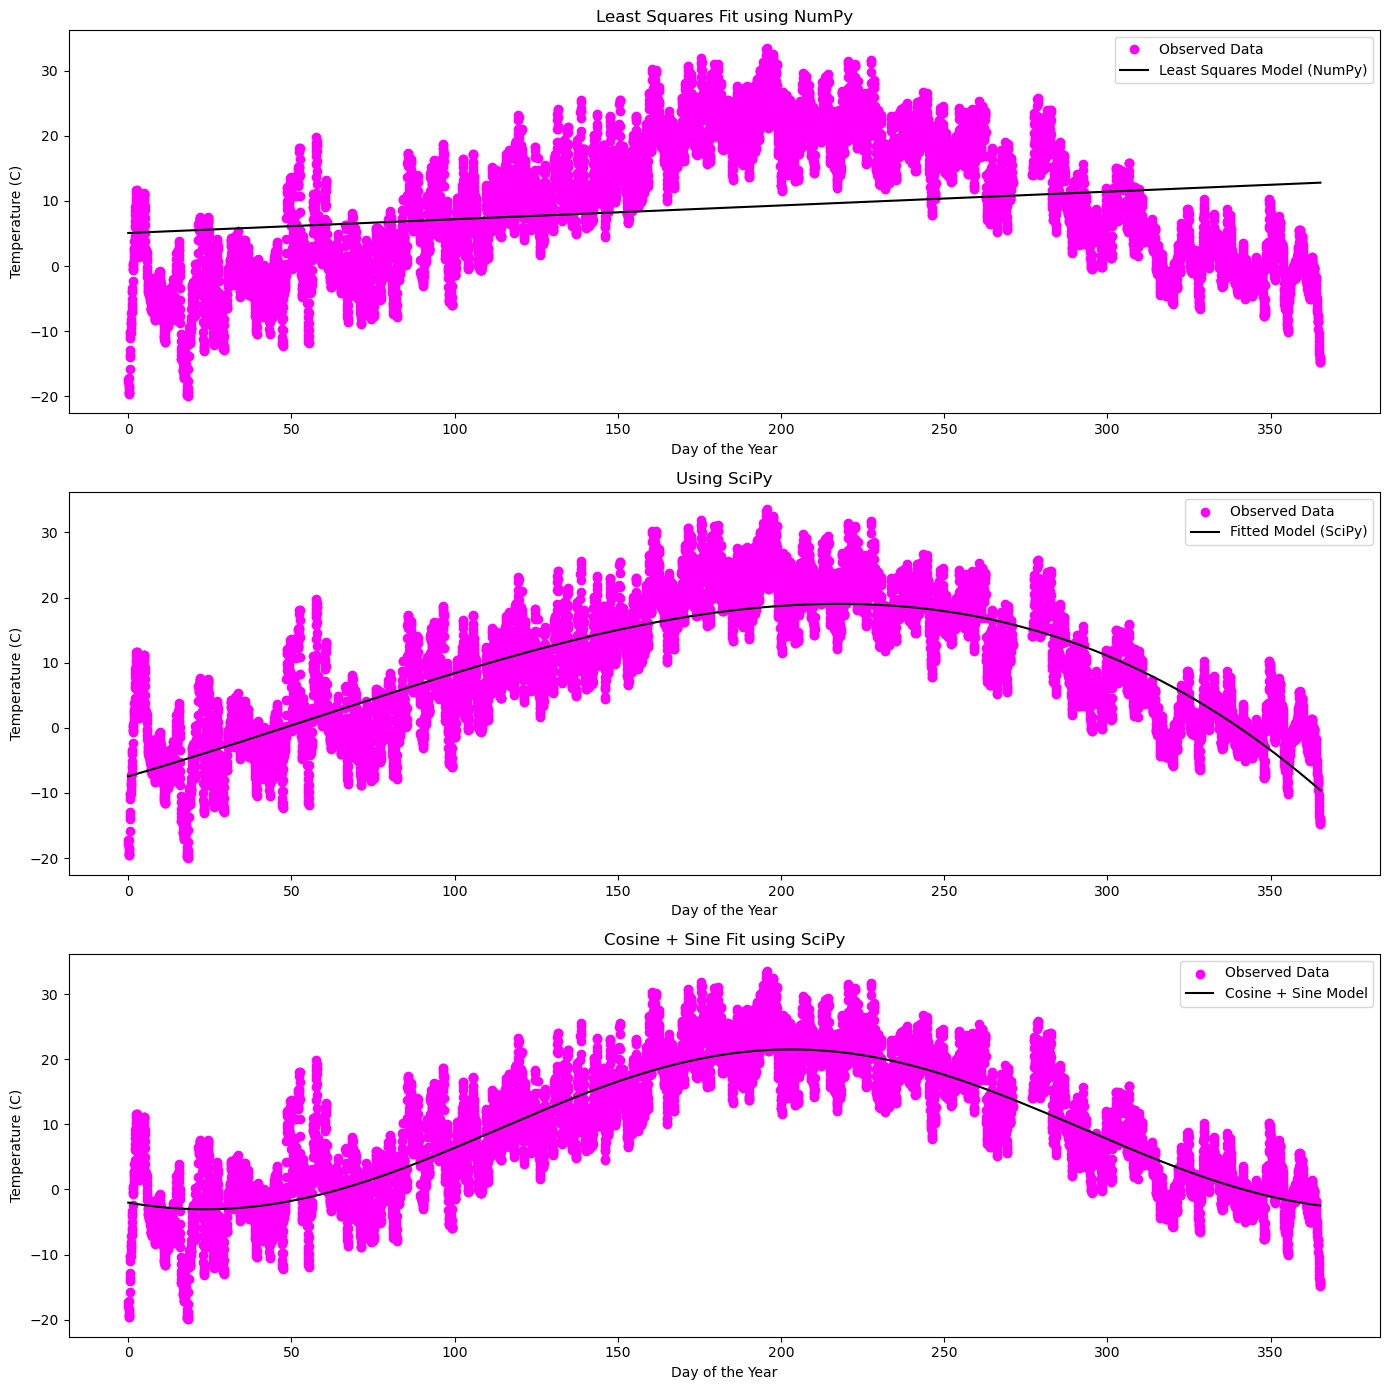

In [15]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import optimize
import numpy.linalg as la

# Loading the data
data = np.genfromtxt('/data9/UN3400/data/brf_temp.txt', delimiter='\t')

t = data[:, 0]
dobs = data[:, 1]

fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(14, 14))

#Part 2: Least Squares Method Using NumPy
N = len(t)
M = 2 
G = np.zeros((N, M))
G[:, 0] = np.ones(N)  
G[:, 1] = t          

GTG = np.matmul(G.T, G)
GTd = np.matmul(G.T, dobs)
mest = la.solve(GTG, GTd)

dpre = np.matmul(G, mest)

# Plotting 
axes[0].plot(t, dobs, 'ro', color='magenta', label='Observed Data')
axes[0].plot(t, dpre, 'k-', label='Least Squares Model (NumPy)')
axes[0].set_xlabel('Day of the Year')
axes[0].set_ylabel('Temperature (C)')
axes[0].legend()
axes[0].set_title('Least Squares Fit using NumPy')

#Verification with SciPy 
def linfunc(x, a, b, c, d):
    return a * x + b * x**2 + c * x**3 + d

mest_ez, _ = optimize.curve_fit(linfunc, t, dobs)
dpre_scipy = linfunc(t, *mest_ez)

# Plotting
axes[1].scatter(t, dobs, color='magenta', label='Observed Data')
axes[1].plot(t, dpre_scipy, 'k-', label='Fitted Model (SciPy)')
axes[1].set_xlabel('Day of the Year')
axes[1].set_ylabel('Temperature (C)')
axes[1].legend()
axes[1].set_title('Using SciPy')

#Part 4: Fitting a function 

def func(t, a, b, P, C):
    return a * np.cos((2 * np.pi / P) * t) + b * np.sin((2 * np.pi / P) * t) + C

initial_guess = [1, 1, 365.25, 0]
mest_ez, _ = optimize.curve_fit(func, t, dobs, p0=initial_guess)
dpre_cosine = func(t, *mest_ez)

# Plotting
axes[2].scatter(t, dobs, color='magenta', label='Observed Data')
axes[2].plot(t, dpre_cosine, 'k-', label='Cosine + Sine Model')
axes[2].set_xlabel('Day of the Year')
axes[2].set_ylabel('Temperature (C)')
axes[2].legend()
axes[2].set_title('Cosine + Sine Fit using SciPy')

# Showing all plots
plt.tight_layout()
plt.show()

In [3]:
A = mest_ez[0]  # Coefficient of cosine
B = mest_ez[1]  # Coefficient of sine

# Calculate the amplitude D
D = np.sqrt(A**2 + B**2)
D

12.274615912439291

In [4]:
P = mest_ez[2]  # Period from the fitted parameters

# Calculate t_max based on the arctan of B/A
t_max = (P / (2 * np.pi)) * np.arctan(B / A)
t_max

23.516456785650938

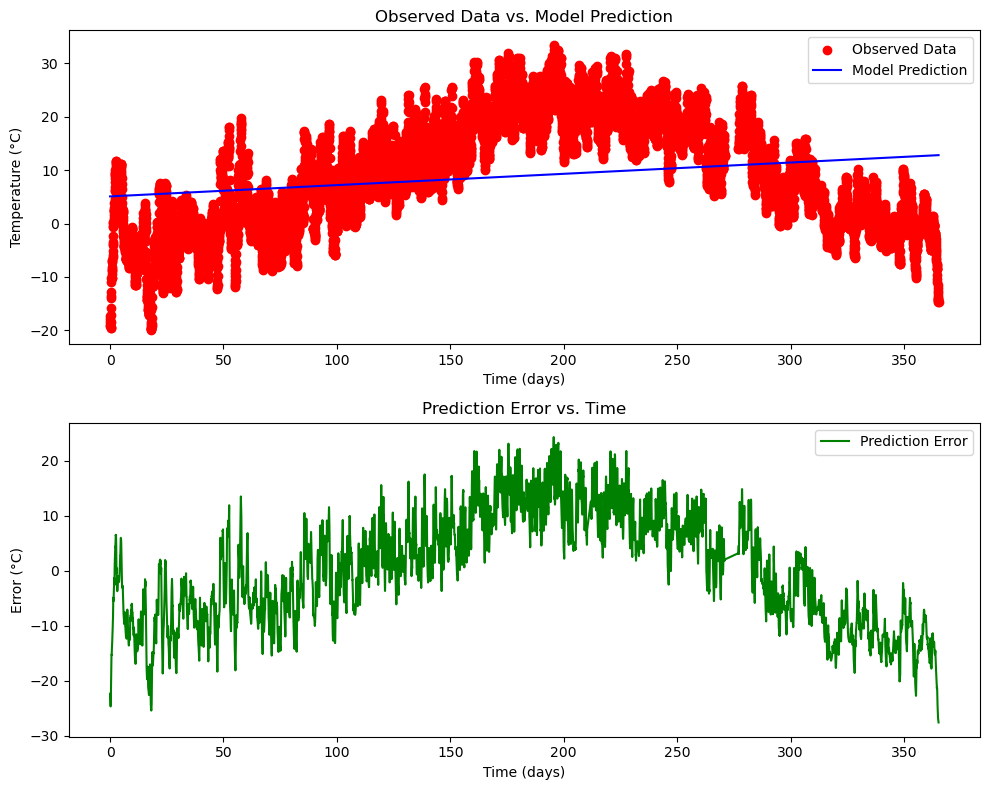

In [5]:
errors = dobs - dpre

# Create the figure and subplots
fig, axes = plt.subplots(nrows=2, figsize=(10, 8))

# Plot observed data and model predictions
axes[0].scatter(t, dobs, color='red', label='Observed Data')
axes[0].plot(t, dpre, color='blue', label='Model Prediction')
axes[0].set_xlabel('Time (days)')
axes[0].set_ylabel('Temperature (°C)')
axes[0].set_title('Observed Data vs. Model Prediction')
axes[0].legend()

# Plot the errors
axes[1].plot(t, errors, color='green', label='Prediction Error')
axes[1].set_xlabel('Time (days)')
axes[1].set_ylabel('Error (°C)')
axes[1].set_title('Prediction Error vs. Time')
axes[1].legend()

plt.tight_layout()
plt.show()